In [1]:
#importin libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data1 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", delimiter='|')

In [3]:
data2 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv", delimiter='|')

In [4]:
data3 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv", delimiter='|')

In [5]:
data4 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv", delimiter='|')

In [6]:
data5 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv", delimiter='|')

In [7]:
data6 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv", delimiter='|')

In [8]:
data7 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv", delimiter='|')

In [9]:
data8 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv", delimiter='|', low_memory = False)

In [10]:
data9 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv", delimiter='|')

In [11]:
data10 = pd.read_csv(r"C:\Users\hkraw\Downloads\Malware Datasets\CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv", delimiter='|')

In [12]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], ignore_index=True)

In [13]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [14]:
data.shape

(25000363, 23)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(8), object(15)
memory usage: 4.3+ GB


In [16]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [17]:
# Calculating the number of missing values in each column
missing_values = data.isnull().sum()

In [18]:
missing_values

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration                0
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    9173939
dtype: int64

In [19]:
# Calculating the percentage of missing values in each column
missing_values*100/len(data)

ts                 0.000000
uid                0.000000
id.orig_h          0.000000
id.orig_p          0.000000
id.resp_h          0.000000
id.resp_p          0.000000
proto              0.000000
service            0.000000
duration           0.000000
orig_bytes         0.000000
resp_bytes         0.000000
conn_state         0.000000
local_orig         0.000000
local_resp         0.000000
missed_bytes       0.000000
history            0.000000
orig_pkts          0.000000
orig_ip_bytes      0.000000
resp_pkts          0.000000
resp_ip_bytes      0.000000
tunnel_parents     0.000000
label              0.000000
detailed-label    36.695223
dtype: float64

In [20]:
column_name = 'id.orig_h'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


                 Value     Count  Percentage
0        192.168.1.196  10446132   41.783921
1      192.168.100.111   6375629   25.502146
2        192.168.1.195   3602157   14.408419
3        192.168.1.200   3392003   13.567815
4      192.168.100.103    994268    3.977014
...                ...       ...         ...
21436   84.210.208.102         1    0.000004
21437     66.191.14.60         1    0.000004
21438     187.51.180.2         1    0.000004
21439  181.170.185.211         1    0.000004
21440   192.94.118.248         1    0.000004

[21441 rows x 3 columns]


In [21]:
column_name = 'detailed-label'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


                       Value    Count  Percentage
0                          -  8777766   35.110554
1  PartOfAHorizontalPortScan  7041695   28.166371
2                     Attack     5962    0.023848
3                  HeartBeat      940    0.003760
4                      Torii       30    0.000120
5                        C&C       16    0.000064
6               FileDownload       15    0.000060


In [22]:
column_name = 'label'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


                                   Value    Count  Percentage
0                                 Benign  8777766   35.110554
1                              Malicious  7046785   28.186731
2                       Malicious   DDoS  5778153   23.112276
3  Malicious   PartOfAHorizontalPortScan  3386241   13.544767
4                        Malicious   C&C     8660    0.034639
5                     Malicious   Attack     2755    0.011020
6               Malicious   FileDownload        3    0.000012


In [23]:
column_name = 'tunnel_parents'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


  Value     Count  Percentage
0     -  25000363       100.0


In [24]:
column_name = 'history'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


        Value     Count  Percentage
0           S  18720002   74.878921
1           C   3592643   14.370363
2           I   2119476    8.477781
3           D    422774    1.691071
4         DTT     65534    0.262132
..        ...       ...         ...
258   DdAtaFf         1    0.000004
259       ^hA         1    0.000004
260  ShAFdfRt         1    0.000004
261    ^hADFr         1    0.000004
262      ^dDA         1    0.000004

[263 rows x 3 columns]


In [25]:
column_name = 'missed_bytes'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


           Value     Count  Percentage
0   0.000000e+00  25000331   99.999872
1   5.792000e+03         9    0.000036
2   2.896000e+03         7    0.000028
3   2.472000e+03         2    0.000008
4   2.920000e+03         2    0.000008
5   1.908819e+09         1    0.000004
6   1.440000e+03         1    0.000004
7   8.088000e+03         1    0.000004
8   1.460000e+03         1    0.000004
9   4.380000e+03         1    0.000004
10  4.344000e+03         1    0.000004
11  1.448000e+03         1    0.000004
12  1.579000e+03         1    0.000004
13  5.390000e+03         1    0.000004
14  4.500000e+03         1    0.000004
15  1.582000e+03         1    0.000004
16  8.160000e+03         1    0.000004


In [26]:
column_name = 'local_orig'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


  Value     Count  Percentage
0     -  25000363       100.0


In [27]:
column_name = 'conn_state'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


     Value     Count  Percentage
0       S0  19142796   76.570072
1      OTH   3685333   14.741118
2   RSTOS0   2119852    8.479285
3       SF     30956    0.123822
4      REJ     16072    0.064287
5       S3      2458    0.009832
6     RSTR      1917    0.007668
7     RSTO       514    0.002056
8       S2       136    0.000544
9       S1       130    0.000520
10      SH       120    0.000480
11   RSTRH        78    0.000312
12     SHR         1    0.000004


In [28]:
column_name = 'resp_bytes'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index,'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


    Value     Count  Percentage
0       -  15265807   61.062341
1       0   9700862   38.802885
2      48     10628    0.042511
3      45      2827    0.011308
4      96      1622    0.006488
..    ...       ...         ...
867   932         1    0.000004
868   815         1    0.000004
869  2092         1    0.000004
870  1759         1    0.000004
871   630         1    0.000004

[872 rows x 3 columns]


In [29]:
column_name = 'service'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index,'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


  Value     Count  Percentage
0     -  24982377   99.928057
1   dns      7033    0.028132
2   ssh      5899    0.023596
3  http      3385    0.013540
4   irc      1647    0.006588
5  dhcp        11    0.000044
6   ssl        11    0.000044


In [30]:
column_name = 'proto'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index,'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


  Value     Count  Percentage
0   tcp  24535142   98.139143
1   udp    440105    1.760394
2  icmp     25116    0.100463


In [31]:
column_name = 'id.resp_p'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index,'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)

         Value     Count  Percentage
0         23.0  15704290   62.816248
1      62336.0   3578396   14.313376
2         81.0   2575670   10.302530
3         80.0   1126095    4.504315
4        992.0   1008424    4.033637
...        ...       ...         ...
65430  25904.0         1    0.000004
65431  27624.0         1    0.000004
65432   2958.0         1    0.000004
65433   3237.0         1    0.000004
65434  35113.0         1    0.000004

[65435 rows x 3 columns]


In [32]:
column_name = 'id.resp_h'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index,'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)

                   Value    Count  Percentage
0         162.248.88.215  3578392   14.313360
1           54.39.87.104  1008351    4.033345
2         209.97.190.136   908544    3.634123
3          216.18.168.16   268405    1.073604
4         200.168.87.203    23295    0.093179
...                  ...      ...         ...
11654569    42.35.27.220        1    0.000004
11654570   124.80.154.73        1    0.000004
11654571  65.228.217.172        1    0.000004
11654572    88.53.92.141        1    0.000004
11654573   173.94.58.125        1    0.000004

[11654574 rows x 3 columns]


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(8), object(15)
memory usage: 4.3+ GB


In [34]:
data.replace('-',None,inplace=True)

In [35]:
data.isnull().sum()*100/len(data)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            99.928057
duration           61.062341
orig_bytes         61.062341
resp_bytes         61.062341
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.100463
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label     71.805777
dtype: float64

In [36]:
cols_to_drop = ['service','duration','orig_bytes','resp_bytes','local_orig','local_resp','tunnel_parents','detailed-label','uid','id.orig_h','id.resp_h']
data.drop(columns=cols_to_drop, inplace = True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             float64
 1   id.orig_p      float64
 2   id.resp_p      float64
 3   proto          object 
 4   conn_state     object 
 5   missed_bytes   float64
 6   history        object 
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  label          object 
dtypes: float64(8), object(4)
memory usage: 2.2+ GB


In [38]:
data.shape

(25000363, 12)

In [39]:
cols_to_label = ['proto','conn_state','history','label']
le = LabelEncoder()
for col in cols_to_label:
    data[col] = le.fit_transform(data[col])

In [40]:
data.head()

,ts,id.orig_p,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,51524.0,23.0,1,6,0.0,40,3.0,180.0,0.0,0.0,1
1,1.525880e+09,56305.0,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,1
2,1.525880e+09,41101.0,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,1
3,1.525880e+09,60905.0,23.0,1,6,0.0,40,3.0,180.0,0.0,0.0,1
4,1.525880e+09,44301.0,23.0,1,6,0.0,40,1.0,60.0,0.0,0.0,1


In [41]:
data['proto'].unique()

array([1, 2, 0])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             float64
 1   id.orig_p      float64
 2   id.resp_p      float64
 3   proto          int32  
 4   conn_state     int32  
 5   missed_bytes   float64
 6   history        int32  
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  label          int32  
dtypes: float64(8), int32(4)
memory usage: 1.9 GB


In [43]:
cor = data.corr()

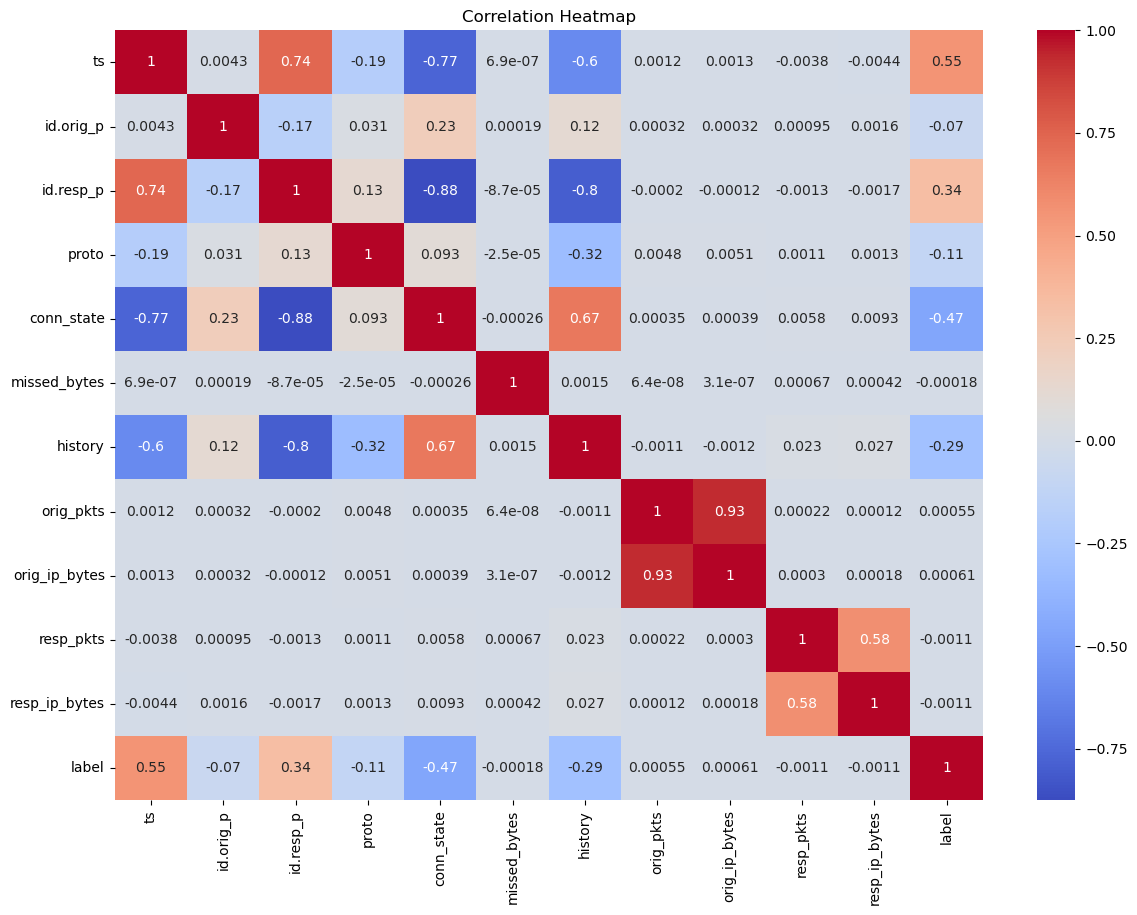

In [44]:
plt.figure(figsize=(14,10))
sns.heatmap(cor, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
cols_to_drop1 = ['missed_bytes','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes']
data.drop(columns=cols_to_drop1, inplace = True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ts          float64
 1   id.orig_p   float64
 2   id.resp_p   float64
 3   proto       int32  
 4   conn_state  int32  
 5   history     int32  
 6   label       int32  
dtypes: float64(3), int32(4)
memory usage: 953.7 MB


In [47]:
data.shape

(25000363, 7)

In [48]:
from sklearn.model_selection import train_test_split

X = data[['ts', 'id.orig_p', 'id.resp_p', 'conn_state', 'history', 'label']]
y = data['proto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model (you can experiment with different values of 'n_neighbors')
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [51]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9999992000116799
